In [2]:
import pandas as pd

data = pd.read_csv('Downloads/ufc-master.csv')

pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

data = data.drop(columns=['RWFlyweightRank', 'RWFeatherweightRank', 'RWStrawweightRank','RWBantamweightRank', 'RHeavyweightRank','RLightHeavyweightRank','RMiddleweightRank',
                          'RWelterweightRank','RLightweightRank','RFeatherweightRank','RBantamweightRank', 'RFlyweightRank','RPFPRank','BWFlyweightRank','BWFeatherweightRank',
                          'BWStrawweightRank','BWBantamweightRank','BHeavyweightRank','BLightHeavyweightRank','BMiddleweightRank','BWelterweightRank','BLightweightRank','BFeatherweightRank',
                          'BBantamweightRank','BFlyweightRank','BPFPRank','RedExpectedValue','BlueExpectedValue','Date','Country','Location','TitleBout','WeightClass','Gender',
                          'NumberOfRounds','BMatchWCRank','RMatchWCRank','Finish','FinishDetails','FinishRound','FinishRoundTime',
                          'TotalFightTimeSecs','RedDecOdds','BlueDecOdds','RSubOdds','BSubOdds','RKOOdds','BKOOdds','EmptyArena'])

data = data.dropna()

data['Winner'].replace(['Red','Blue'],[1,0], inplace=True)
data['BetterRank'].replace(['Red','Blue','neither'],[1,-1,0], inplace=True)

data = pd.get_dummies(data, columns=['BlueStance','RedStance'])

#data.count()
#data.info()
data.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,Winner,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,...,AvgTDDif,BetterRank,BlueStance_Open Stance,BlueStance_Orthodox,BlueStance_Southpaw,BlueStance_Switch,RedStance_Open Stance,RedStance_Orthodox,RedStance_Southpaw,RedStance_Switch
0,Brandon Moreno,Amir Albazi,-180.0,150.0,1,0,5,0,2.72,0.34,...,-0.20,1,0,1,0,0,0,1,0,0
1,Erin Blanchfield,Rose Namajunas,-155.0,130.0,1,0,2,0,3.71,0.42,...,-0.40,1,0,1,0,0,0,1,0,0
2,Caio Machado,Brendson Ribeiro,-192.0,160.0,0,2,0,0,3.16,0.42,...,1.27,0,0,1,0,0,0,0,1,0
3,Ariane da Silva,Jasmine Jasudavicius,190.0,-250.0,0,0,2,0,3.70,0.44,...,1.98,1,0,1,0,0,0,1,0,0
4,Marc-Andre Barriault,Dustin Stoltzfus,-270.0,220.0,0,1,0,0,3.47,0.44,...,2.10,0,0,1,0,0,0,1,0,0


In [5]:
print(round(data.RedAge.mean(),1),
data.RedAge.max(),
data.RedAge.min())

print(round(data.BlueAge.mean(),1),
data.BlueAge.max(),
data.BlueAge.min())

30.6 45 18
30.1 47 20


In [9]:
red_age_winners = data.groupby('RedAge')['Winner'].sum().reset_index(name='age_winners')
red_age_count = data.groupby('RedAge')['Winner'].count().reset_index(name='age_count')
red_age_percentage = red_age_winners.iloc[:,1] / red_age_count.iloc[:,1]

red_age_breakdown = pd.DataFrame({'Age': red_age_winners.iloc[:,0], 'Winning Percentage': red_age_percentage, 'Sample Size': 
                                 red_age_count.iloc[:,1]})
red_age_breakdown

,Age,Winning Percentage,Sample Size
0,18,0.666667,3
1,19,0.666667,3
2,20,0.666667,9
3,21,0.809524,21
4,22,0.686275,51
5,23,0.699029,103
6,24,0.616883,154
7,25,0.604762,210
8,26,0.646302,311
9,27,0.664835,364


In [10]:
blue_age_winners = data.groupby('BlueAge')['Winner'].sum().reset_index(name='age_winners')
blue_age_count = data.groupby('BlueAge')['Winner'].count().reset_index(name='age_count')
blue_age_percentage = 1 - (blue_age_winners.iloc[:,1] / blue_age_count.iloc[:,1])

blue_age_breakdown = pd.DataFrame({'Age': blue_age_winners.iloc[:,0], 'Winning Percentage': blue_age_percentage, 'Sample Size': 
                                 blue_age_count.iloc[:,1]})
blue_age_breakdown

,Age,Winning Percentage,Sample Size
0,20,0.400000,10
1,21,0.619048,21
2,22,0.510204,49
3,23,0.581818,110
4,24,0.510204,147
5,25,0.504032,248
6,26,0.479532,342
7,27,0.485393,445
8,28,0.456274,526
9,29,0.435754,537


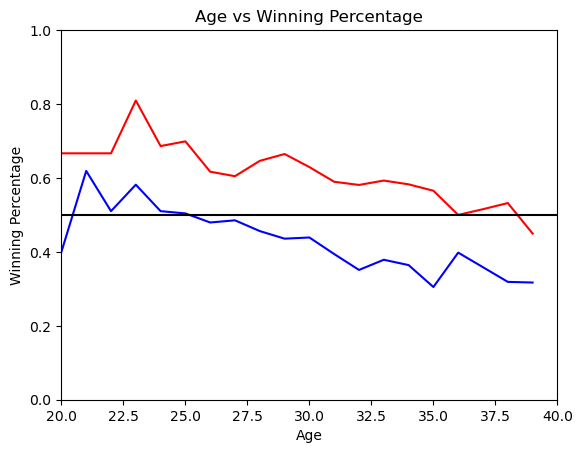

In [17]:
import matplotlib.pyplot as plt

x = blue_age_breakdown.iloc[0:20,0]
y = red_age_breakdown.iloc[0:20,1]
z = blue_age_breakdown.iloc[0:20,1]

fig, ax = plt.subplots()

ax.plot(x, y, color='red')
ax.plot(x, z, color='blue')
plt.axhline(y=.5, color='black')

ax.set_xlabel('Age')
ax.set_ylabel('Winning Percentage')
ax.set_title('Age vs Winning Percentage')
ax.set_xlim([20, 40])
ax.set_ylim([0, 1])

plt.show()

In [19]:
print(round(data.RedCurrentWinStreak.mean(),1),
data.RedCurrentWinStreak.max(),
data.RedCurrentWinStreak.min())

print(round(data.BlueCurrentWinStreak.mean(),1),
data.BlueCurrentWinStreak.max(),
data.BlueCurrentWinStreak.min())

print(round(data.RedCurrentLoseStreak.mean(),1),
data.RedCurrentLoseStreak.max(),
data.RedCurrentLoseStreak.min())

print(round(data.BlueCurrentLoseStreak.mean(),1),
data.BlueCurrentLoseStreak.max(),
data.BlueCurrentLoseStreak.min())

1.2 17 0
1.1 12 0
0.6 7 0
0.6 6 0


In [23]:
red_winners = data.groupby('RedCurrentWinStreak')['Winner'].sum().reset_index(name='red_winners')
red_count = data.groupby('RedCurrentWinStreak')['Winner'].count().reset_index(name='red_count')
red_percentage = red_winners.iloc[:,1] / red_count.iloc[:,1]

red_winstreak = pd.DataFrame({'Winstreak': red_winners.iloc[:,0], 'Winning Percentage': red_percentage, 'Sample Size': 
                                 red_count.iloc[:,1]})
print(red_winstreak)

red_winners = data.groupby('RedCurrentLoseStreak')['Winner'].sum().reset_index(name='red_winners')
red_count = data.groupby('RedCurrentLoseStreak')['Winner'].count().reset_index(name='red_count')
red_percentage = red_winners.iloc[:,1] / red_count.iloc[:,1]

red_lossstreak = pd.DataFrame({'Lossstreak': red_winners.iloc[:,0], 'Winning Percentage': red_percentage, 'Sample Size': 
                                 red_count.iloc[:,1]})
print(red_lossstreak)

blue_winners = data.groupby('BlueCurrentWinStreak')['Winner'].sum().reset_index(name='blue_winners')
blue_count = data.groupby('BlueCurrentWinStreak')['Winner'].count().reset_index(name='blue_count')
blue_percentage = 1 - (blue_winners.iloc[:,1] / blue_count.iloc[:,1])

blue_winstreak = pd.DataFrame({'Winstreak': blue_winners.iloc[:,0], 'Winning Percentage': blue_percentage, 'Sample Size': 
                                 blue_count.iloc[:,1]})
print(blue_winstreak)

blue_winners = data.groupby('BlueCurrentLoseStreak')['Winner'].sum().reset_index(name='blue_winners')
blue_count = data.groupby('BlueCurrentLoseStreak')['Winner'].count().reset_index(name='blue_count')
blue_percentage = 1 - (blue_winners.iloc[:,1] / blue_count.iloc[:,1])

blue_lossstreak = pd.DataFrame({'Lossstreak': blue_winners.iloc[:,0], 'Winning Percentage': blue_percentage, 'Sample Size': 
                                 blue_count.iloc[:,1]})
print(blue_lossstreak)

    Winstreak  Winning Percentage  Sample Size
0           0            0.547997         2396
1           1            0.571642         1340
2           2            0.616071          672
3           3            0.618644          354
4           4            0.598870          177
5           5            0.655914           93
6           6            0.660377           53
7           7            0.600000           35
8           8            0.826087           23
9           9            0.687500           16
10         10            1.000000           11
11         11            0.916667           12
12         12            0.700000           10
13         13            0.500000            4
14         14            1.000000            2
15         15            0.666667            3
16         16            0.500000            2
17         17            1.000000            1
   Lossstreak  Winning Percentage  Sample Size
0           0            0.600346         2890
1           1

In [25]:
winstreak_df = pd.DataFrame({'Winstreak':red_winstreak.iloc[0:8,0], 'Red Winning Percentage': red_winstreak.iloc[0:8,1],
                            'Blue Winning Percentage':blue_winstreak.iloc[0:8,1]})
winstreak_df
                             
                            

,Winstreak,Red Winning Percentage,Blue Winning Percentage
0,0,0.547997,0.399405
1,1,0.571642,0.405046
2,2,0.616071,0.470320
3,3,0.618644,0.458015
4,4,0.598870,0.484536
5,5,0.655914,0.511111
6,6,0.660377,0.612245
7,7,0.600000,0.520000


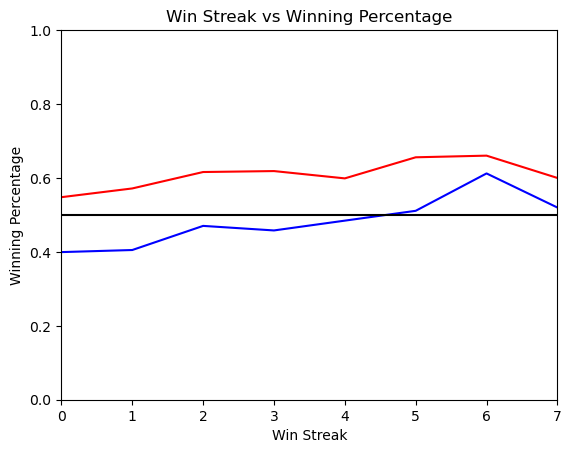

In [27]:
x = winstreak_df.iloc[:,0]
y = winstreak_df.iloc[:,1]
z = winstreak_df.iloc[:,2]

fig, ax = plt.subplots()

ax.plot(x, y, color='red')
ax.plot(x, z, color='blue')
plt.axhline(y=.5, color='black')

ax.set_xlabel('Win Streak')
ax.set_ylabel('Winning Percentage')
ax.set_title('Win Streak vs Winning Percentage')
ax.set_xlim([0, 7])
ax.set_ylim([0, 1])

plt.show()

In [28]:
lossstreak_df = pd.DataFrame({'Lossstreak':red_lossstreak.iloc[0:5,0], 'Red Winning Percentage': red_lossstreak.iloc[0:5,1],
                            'Blue Winning Percentage':blue_lossstreak.iloc[0:5,1]})
lossstreak_df

,Lossstreak,Red Winning Percentage,Blue Winning Percentage
0,0,0.600346,0.436270
1,1,0.561494,0.405003
2,2,0.531760,0.417031
3,3,0.496774,0.330709
4,4,0.475000,0.470588


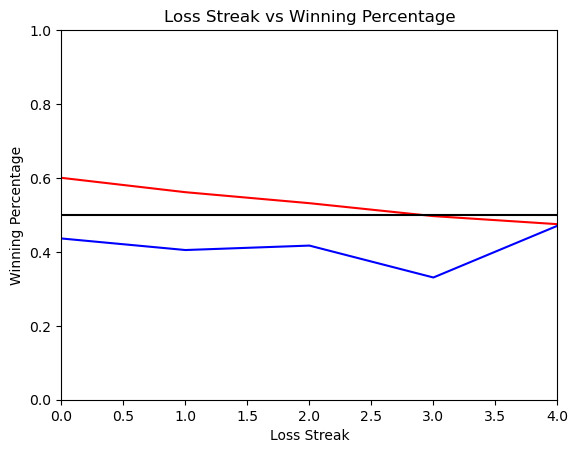

In [29]:
x = lossstreak_df.iloc[:,0]
y = lossstreak_df.iloc[:,1]
z = lossstreak_df.iloc[:,2]

fig, ax = plt.subplots()

ax.plot(x, y, color='red')
ax.plot(x, z, color='blue')
plt.axhline(y=.5, color='black')

ax.set_xlabel('Loss Streak')
ax.set_ylabel('Winning Percentage')
ax.set_title('Loss Streak vs Winning Percentage')
ax.set_xlim([0, 4])
ax.set_ylim([0, 1])

plt.show()